         Date     Open    High     Low   Close    Volume
0  31-Mar-2021  419.80  419.80  413.35  414.15   7445134
1  30-Mar-2021  405.00  420.45  405.00  418.10  13171390
2  26-Mar-2021  404.80  407.70  400.65  403.90   9033369
3  25-Mar-2021  410.70  411.70  397.75  399.65  12737129
4  24-Mar-2021  411.35  415.45  409.20  411.00   5140347

****
             Date     Open    High     Low   Close   Volume
2970  09-Apr-2009  285.00  288.75  271.80  274.45  1984300
2971  08-Apr-2009  261.15  289.80  258.00  282.35  3101750
2972  06-Apr-2009  272.00  279.00  262.35  269.50  1521576
2973  02-Apr-2009  255.05  272.40  255.00  270.10  1424807
2974  01-Apr-2009  246.00  254.70  240.15  252.40   769003
_________________________________________________________

OPEN 
	Average :  426.69307563025285 
	Maximum :  755.85 
	Minimum :  163.1 
	Standard Deviation :  125.489302744551


HIGH 
	Average :  432.16598319327574 
	Maximum :  755.85 
	Minimum :  171.35 
	Standard Deviation :  126.87705463998351

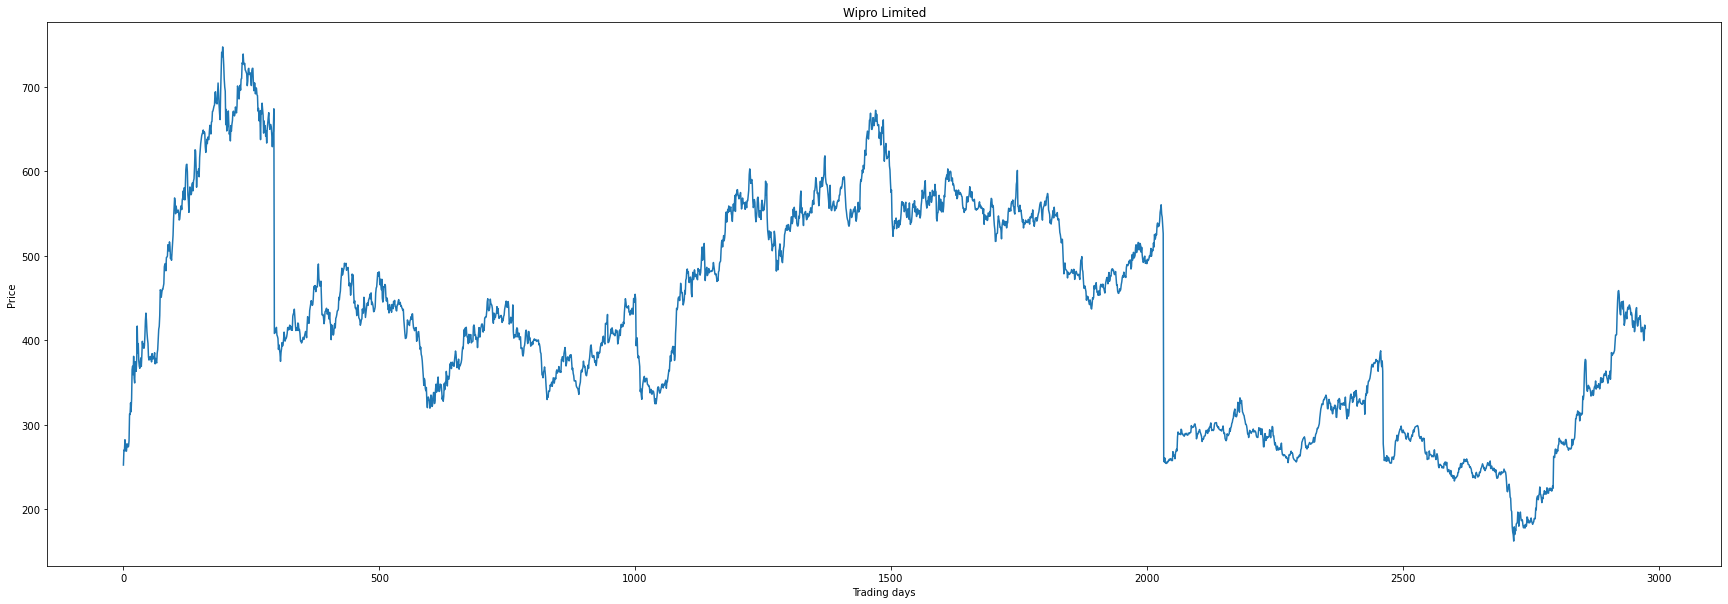

In [1]:
import numpy as np
import pandas as pd

df = pd.read_excel("/home/shravan/Desktop/Datasets/IT/wipro/wip.xlsx")

print(df.head())
print("\n****\n",df.tail())

print("_________________________________________________________\n\nOPEN \n\tAverage : ",np.mean(df.loc[:]['Open']),"\n\tMaximum : ", np.max(df['Open']),"\n\tMinimum : ", np.min(df['Open']),"\n\tStandard Deviation : ", np.std(df['Open']))
print("\n\nHIGH \n\tAverage : ",np.mean(df.loc[:]['High']),"\n\tMaximum : ", np.max(df['High']),"\n\tMinimum : ", np.min(df['High']),"\n\tStandard Deviation : ", np.std(df['High']))
print("\n\nLOW \n\tAverage : ",np.mean(df.loc[:]['Low']),"\n\tMaximum : ", np.max(df['Low']),"\n\tMinimum : ", np.min(df['Low']),"\n\tStandard Deviation : ", np.std(df['Low']))
print("\n\nCLOSE \n\tAverage : ",np.mean(df.loc[:]['Close']),"\n\tMaximum : ", np.max(df['Close']),"\n\tMinimum : ", np.min(df['Close']),"\n\tStandard Deviation : ", np.std(df['Close']))
print("\n\nVOLUME \n\tAverage : ",np.mean(df.loc[:]['Volume']),"\n\tMaximum : ", np.max(df['Volume']),"\n\tMinimum : ", np.min(df['Volume']),"\n\tStandard Deviation : ", np.std(df['Volume']))

def reverse_data(df):
    date = []
    day = []
    open = []
    high = []
    low = []
    close = []
    volume = []
    for i in range(len(df)-1, -1, -1):
        day.append((len(df)-1)-i)
        date.append(df.loc[i]['Date '])
        open.append(df.loc[i]['Open'])
        high.append(df.loc[i]['High'])
        low.append(df.loc[i]['Low'])
        close.append(df.loc[i]['Close'])
        volume.append(df.loc[i]['Volume'])
    stocks = pd.DataFrame()
    stocks['Day'] = day
    stocks['Date'] = date
    stocks['Open'] = open
    stocks['High'] = high
    stocks['Low'] = low
    stocks['Close'] = close
    stocks['Volume'] = volume
    return stocks

stocks = reverse_data(df)

print(stocks.head())
print("\n****\n",stocks.tail())

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (30,10)
fig,ax = plt.subplots()

ax.plot(stocks['Day'],stocks['Close'])
plt.xlabel("Trading days")
plt.ylabel("Price")
plt.title("Wipro Limited")
plt.show()

   Day         Date      Open      High       Low     Close    Volume
0    0  01-Apr-2009  0.139857  0.142601  0.141493  0.153892  0.005701
1    1  02-Apr-2009  0.155124  0.172883  0.167514  0.184141  0.010732
2    2  06-Apr-2009  0.183720  0.184175  0.180393  0.183115  0.011474
3    3  08-Apr-2009  0.165415  0.202652  0.172770  0.205076  0.023598
4    4  09-Apr-2009  0.205652  0.200855  0.196951  0.191575  0.015024

****
        Day         Date      Open      High       Low     Close    Volume
2970  2970  24-Mar-2021  0.418811  0.417622  0.437708  0.424934  0.039238
2971  2971  25-Mar-2021  0.417714  0.411206  0.417645  0.405537  0.097522
2972  2972  26-Mar-2021  0.407760  0.404363  0.422726  0.412800  0.069106
2973  2973  30-Mar-2021  0.408098  0.426176  0.430349  0.437067  0.100853
2974  2974  31-Mar-2021  0.433066  0.425064  0.444980  0.430317  0.056921


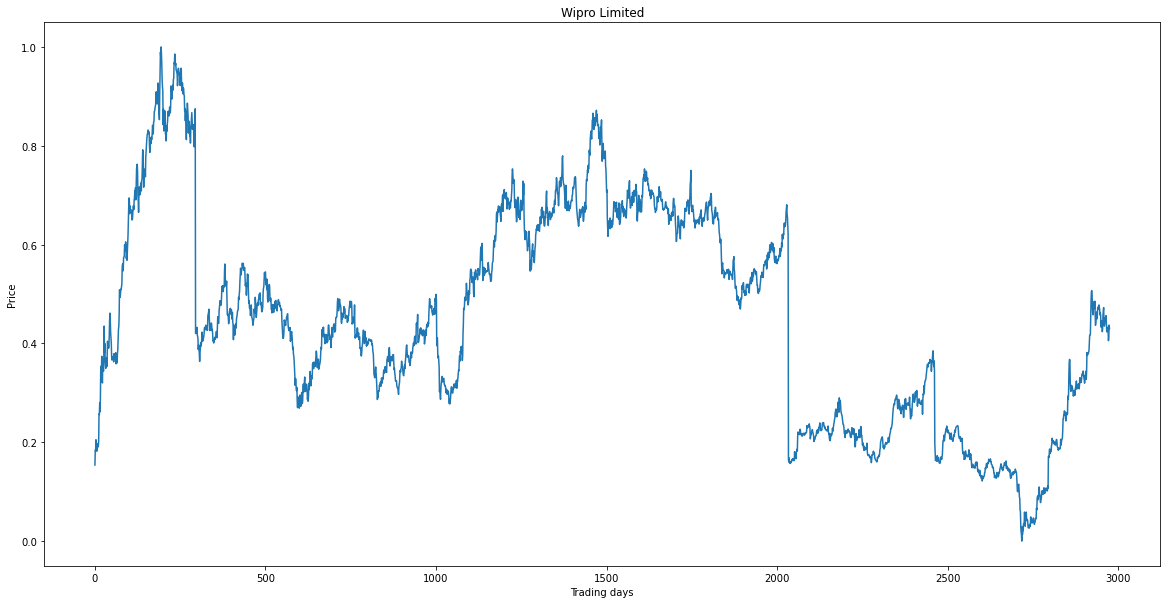

In [2]:
from sklearn.preprocessing import MinMaxScaler

def get_normalised_data(data):
    scaler = MinMaxScaler()
    numerical = ['Open','High','Low','Close','Volume']
    data[numerical] = scaler.fit_transform(data[numerical])
    return data

stocks = get_normalised_data(stocks)

print(stocks.head())
print("\n****\n",stocks.tail())

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,10)
fig,ax = plt.subplots()

ax.plot(stocks['Day'],stocks['Close'])
plt.xlabel("Trading days")
plt.ylabel("Price")
plt.title("Wipro Limited")
plt.show()

In [3]:
import math
from IPython.display import display
import time
from keras.layers.core import Dense,Dropout,Activation
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from keras.layers.recurrent import LSTM
from keras.layers.recurrent import GRU
from keras.layers.recurrent import SimpleRNN

#UNROLL_FUNCTION
def unroll(stocks,unroll_length):
    result = []
    for i in range(len(stocks)-unroll_length+1):
        result.append(stocks[i : (i+unroll_length)])
    return np.asarray(result)

#SIMPLERNN_MODEL
def build_model(input_dim,output_dim,return_sequences):
    model = Sequential()
    model.add(SimpleRNN(input_shape = (None,input_dim), units = output_dim, return_sequences = return_sequences))
    model.add(Dropout(0.1))
    model.add(SimpleRNN(units = 100, return_sequences = False))
    model.add(Dense(units = 100))
    model.add(Dense(units = 1))
    model.add(Activation('linear'))
    return model

#LSTM_MODEL
def build_lstm_model(input_dim, output_dim, return_sequences):
    model = Sequential()
    model.add(LSTM(input_shape = (None, input_dim), units = output_dim, return_sequences = return_sequences))
    model.add(LSTM(units = 128, return_sequences = False))
    model.add(Dense(units = 200))
    model.add(Dense(units = 1))
    model.add(Activation('linear'))
    return model


#GRU_MODEL
def build_gru_model(input_dim, output_dim, return_sequences):
    model = Sequential()
    model.add(GRU(input_shape = (None,input_dim), units = output_dim, return_sequences=return_sequences))
    #model.add(Dropout(0.2))
    model.add(GRU(units=128,return_sequences = False))
    #model.add(Dropout(0.2))
    model.add(Dense(units = 200))
    model.add(Dense(units = 1))
    model.add(Activation('linear'))
    return model


def plot_prediction(actual, prediction, title='WIPRO TRADING vs PREDICTION', y_label='Price INR', x_label='Trading Days'):
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Add labels
    plt.ylabel(y_label)
    plt.xlabel(x_label)

    # Plot actual and predicted close values
    plt.plot(actual, '#00FF00', label='Adjusted Close')
    plt.plot(prediction, '#0000FF', label='Predicted Close')

    # Set title
    ax.set_title(title)
    ax.legend(loc='upper left')
    plt.show()


#RESULT_STAT_FUNCTION
def err_stat(y_test,preds):
    Error = preds - y_test
    print("Standard Deviation of Error : ", np.std(Error))
    stdErr = np.std(Error)
    DstdErr = stdErr * (np.max(df['Close']) - np.min(df['Close']))
    print("Denormalised Standard Deviation : ", DstdErr)
    print("Ratio of Standard Deviation of Error to Standard Deviation of Stock Price : ", DstdErr/np.std(df['Close']))




#####
#TRAIN_TEST_SPLIT
stocks = stocks.drop(['Date','Day'], axis =1)
stocks.head()

def train_test_split(stocks,unroll_length,prediction_size,prediction_time):
    x_test_start = prediction_size + prediction_time + unroll_length - 1
    
    #train data
    x_train = stocks[0 : (-x_test_start - prediction_time)].to_numpy()
    y_train = stocks[ (unroll_length - 1 + prediction_time) : -x_test_start]['Close'].to_numpy()
    
    #test_data
    x_test = stocks[-x_test_start : -prediction_time].to_numpy()
    y_test = stocks[-prediction_size:]['Close'].to_numpy()

    
    return x_train,x_test,y_train,y_test

prediction_size = 744
prediction_time = 5
unroll_length = 50

x_train,x_test,y_train,y_test = train_test_split(stocks,unroll_length,prediction_size,prediction_time)

x_train = unroll(x_train,unroll_length)
x_test = unroll(x_test,unroll_length)

print("x_train", x_train.shape)
print("y_train", y_train.shape)
print("x_test", x_test.shape)
print("y_test", y_test.shape)

#####



x_train (2123, 50, 5)
y_train (2123,)
x_test (744, 50, 5)
y_test (744,)


Epoch 1/50
63/63 [==============================] - 2s 16ms/step - loss: 0.2380 - val_loss: 0.0015
Epoch 2/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0075 - val_loss: 0.0038
Epoch 3/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0061 - val_loss: 3.6041e-04
Epoch 4/50
63/63 [==============================] - 1s 10ms/step - loss: 0.0038 - val_loss: 2.9602e-04
Epoch 5/50
63/63 [==============================] - 1s 10ms/step - loss: 0.0052 - val_loss: 4.8989e-04
Epoch 6/50
63/63 [==============================] - 1s 10ms/step - loss: 0.0033 - val_loss: 6.2515e-04
Epoch 7/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0037 - val_loss: 5.2942e-04
Epoch 8/50
63/63 [==============================] - 1s 10ms/step - loss: 0.0050 - val_loss: 4.7749e-04
Epoch 9/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0038 - val_loss: 0.0033
Epoch 10/50
63/63 [==============================] - 1s 11ms/step - loss: 0.0047 - va

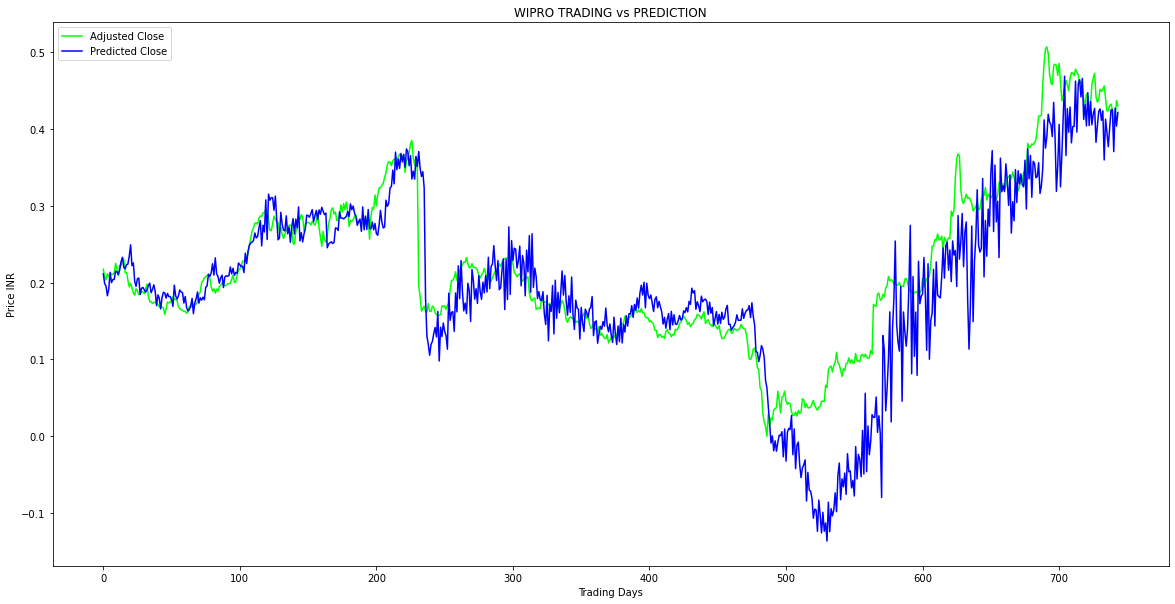

Standard Deviation of Error :  0.15816707587961007
Denormalised Standard Deviation :  92.55146445095383
Ratio of Standard Deviation of Error to Standard Deviation of Stock Price :  0.7383566955096714


In [4]:
#TRAIN_SIMPLE_RNN_MODEL
wip_model = build_model(input_dim = x_train.shape[-1], output_dim = unroll_length, return_sequences=True)
wip_model.compile(loss = "mean_squared_error", optimizer = 'Adam')
wip_model.fit(x_train, y_train, epochs =50, validation_split = 0.05)

#PRINT_RESULT
preds = wip_model.predict(x_test)
plot_prediction(y_test, preds)
err_stat(y_test,preds)

Train Score: 0.00199278 MSE (0.04464056 RMSE)
Test Score: 0.00353449 MSE (0.05945160 RMSE)
Epoch 1/50
63/63 [==============================] - 4s 34ms/step - loss: 0.0541 - val_loss: 7.3389e-04
Epoch 2/50
63/63 [==============================] - 2s 27ms/step - loss: 0.0029 - val_loss: 3.1083e-04
Epoch 3/50
63/63 [==============================] - 2s 26ms/step - loss: 0.0033 - val_loss: 2.0508e-04
Epoch 4/50
63/63 [==============================] - 2s 27ms/step - loss: 0.0028 - val_loss: 3.3991e-04
Epoch 5/50
63/63 [==============================] - 2s 26ms/step - loss: 0.0025 - val_loss: 7.8758e-04
Epoch 6/50
63/63 [==============================] - 2s 27ms/step - loss: 0.0029 - val_loss: 2.2610e-04
Epoch 7/50
63/63 [==============================] - 2s 27ms/step - loss: 0.0025 - val_loss: 4.8759e-04
Epoch 8/50
63/63 [==============================] - 2s 26ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 9/50
63/63 [==============================] - 2s 27ms/step - loss: 0.0019 - val_los

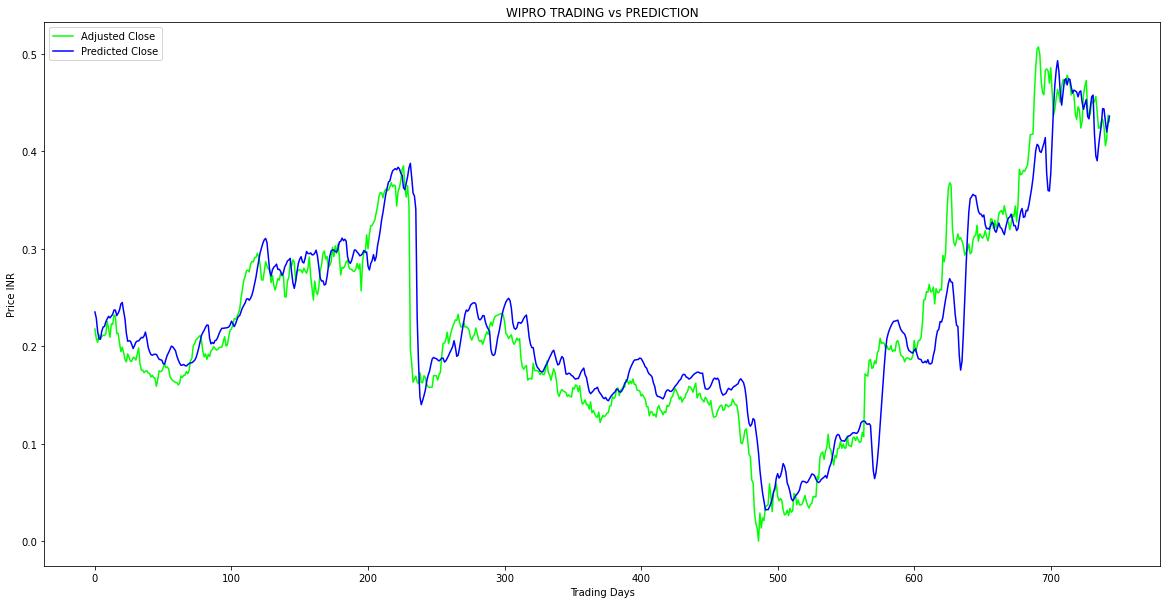

Standard Deviation of Error :  0.14300070528543407
Denormalised Standard Deviation :  83.67686269777174
Ratio of Standard Deviation of Error to Standard Deviation of Stock Price :  0.6675569338493216


In [5]:
trainScore = wip_model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = wip_model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))




wip_lstm_model = build_lstm_model(x_train.shape[-1], unroll_length, return_sequences = True)
wip_lstm_model.compile(loss = "mean_squared_error", optimizer = 'Adam')
wip_lstm_model.fit(x_train, y_train, epochs = 50, validation_split = 0.05)

preds_lstm = wip_lstm_model.predict(x_test)
plot_prediction(y_test, preds_lstm)
err_stat(y_test,preds_lstm)

Train Score: 0.00179827 MSE (0.04240607 RMSE)
Test Score: 0.00130541 MSE (0.03613045 RMSE)
Epoch 1/50
63/63 [==============================] - 3s 31ms/step - loss: 0.0511 - val_loss: 4.4233e-04
Epoch 2/50
63/63 [==============================] - 1s 22ms/step - loss: 0.0027 - val_loss: 1.5597e-04
Epoch 3/50
63/63 [==============================] - 1s 22ms/step - loss: 0.0020 - val_loss: 1.5200e-04
Epoch 4/50
63/63 [==============================] - 1s 22ms/step - loss: 0.0029 - val_loss: 1.5709e-04
Epoch 5/50
63/63 [==============================] - 1s 23ms/step - loss: 0.0018 - val_loss: 1.4741e-04
Epoch 6/50
63/63 [==============================] - 1s 23ms/step - loss: 0.0023 - val_loss: 1.7499e-04
Epoch 7/50
63/63 [==============================] - 1s 22ms/step - loss: 0.0019 - val_loss: 1.4629e-04
Epoch 8/50
63/63 [==============================] - 1s 22ms/step - loss: 0.0023 - val_loss: 1.7499e-04
Epoch 9/50
63/63 [==============================] - 1s 22ms/step - loss: 0.0015 - val

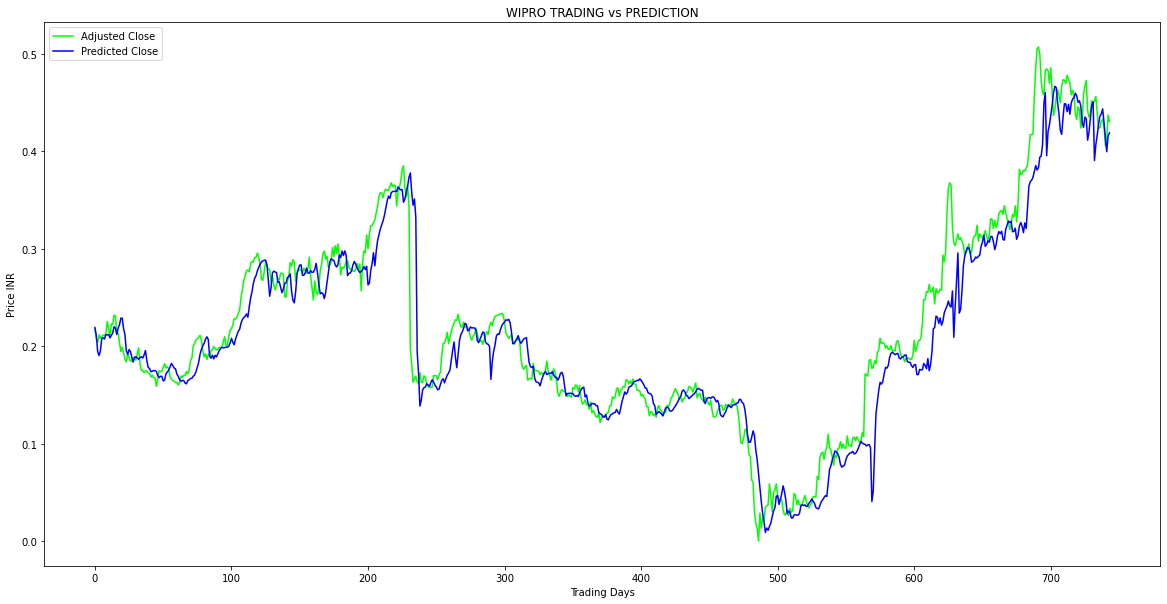

Standard Deviation of Error :  0.14493122789640953
Denormalised Standard Deviation :  84.80650800358403
Ratio of Standard Deviation of Error to Standard Deviation of Stock Price :  0.6765690135613567
Train Score: 0.00173637 MSE (0.04166982 RMSE)
Test Score: 0.00100129 MSE (0.03164317 RMSE)


In [6]:
trainScore = wip_lstm_model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = wip_lstm_model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))


#TRAIN_GRU_MODEL
wip_gru_model = build_gru_model(x_train.shape[-1], unroll_length, return_sequences = True)
wip_gru_model.compile(loss = "mean_squared_error", optimizer = 'Adam')
wip_gru_model.fit(x_train, y_train, epochs = 50, validation_split = 0.05)

preds_gru = wip_gru_model.predict(x_test)
plot_prediction(y_test, preds_gru)
err_stat(y_test,preds_gru)

trainScore = wip_gru_model.evaluate(x_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = wip_gru_model.evaluate(x_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))